In [16]:
import pandas as pd
import numpy as np
from pandasql import sqldf

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
products = pd.read_csv('products.csv')

In [5]:
products.head()

,ORDER_ITEM_NAME,DELIVERY_DATE,Quantity,Distinct Orders
0,Jowar & Ragi Gluten-free bread (700 g),2021-12-03 00:00:00,8.0,8
1,Multigrain Sandwich Loaf (400 g),2021-12-04 00:00:00,10.0,10
2,Multigrain Sandwich Loaf (400 g),2021-12-13 00:00:00,14.0,14
3,Walnut & Cranberry Sourdough Bread (500g),2021-12-24 00:00:00,3.0,3
4,Jowar & Ragi Gluten-free bread (700 g),2021-12-15 00:00:00,10.0,10


In [8]:
check = products['Quantity'] == products['Distinct Orders']

# Drop Distinct order column 
Distinct order and Quantity have same value (except for 64 rows, they also have roughly same value) Regardless we only care about quantity and hence we will drop distinct order column.

In [9]:
products = products.drop(['Distinct Orders'],axis=1)

In [10]:
products.head()

,ORDER_ITEM_NAME,DELIVERY_DATE,Quantity
0,Jowar & Ragi Gluten-free bread (700 g),2021-12-03 00:00:00,8.0
1,Multigrain Sandwich Loaf (400 g),2021-12-04 00:00:00,10.0
2,Multigrain Sandwich Loaf (400 g),2021-12-13 00:00:00,14.0
3,Walnut & Cranberry Sourdough Bread (500g),2021-12-24 00:00:00,3.0
4,Jowar & Ragi Gluten-free bread (700 g),2021-12-15 00:00:00,10.0


# Formating Date Column
Since the entire column has the same month, year and time. We will remove these values as they wont help us extract any meaningful trends in the data. We will only keep the specific date of the day.

In [11]:
product = products.copy() #Creating backup of original data

In [12]:
sliced = products.DELIVERY_DATE.str.split()
sliced = sliced.str[0]
sliced = sliced.str.split('-')
sliced = sliced.str[-1]
products['DELIVERY_DATE'] = sliced.astype(int)

In [13]:
products['DELIVERY_DATE'].describe()

count    460.000000
mean      15.378261
std        8.652601
min        1.000000
25%        8.000000
50%       15.000000
75%       23.000000
max       30.000000
Name: DELIVERY_DATE, dtype: float64

# Estimating demand for each product on an 'Average Day' in a month

### DEMAND/DAY = (Total quantity sold in a month)/ (total number of days in a month)

### Running SQL query to group by products and find aggregate sum of units sold over 30 days. Followed by finding average unit solds per day 


In [17]:
query = sqldf(" SELECT ORDER_ITEM_NAME ,ROUND(SUM(Quantity)/30,2) AS estimated_units FROM products GROUP BY ORDER_ITEM_NAME ORDER BY  ROUND(SUM(Quantity)/30,2) DESC; ")
query

,ORDER_ITEM_NAME,estimated_units
0,Multigrain Sandwich Loaf (400 g),12.10
1,Jowar & Ragi Gluten-free bread (700 g),6.43
2,Whole Wheat Sandwich Loaf (400 g),5.53
3,Seeded Gluten Free Bread,3.73
4,Walnut & Cranberry Sourdough Bread (500g),2.90
5,Miche Whole Wheat Sourdough Bread (550g),2.67
6,Sourdough Sandwich Loaf Bread (650g),2.07
7,Everything Bagel (Pack of 2) + Cream Cheese (2...,1.67
8,French Baguette (16 inch - 350 g),1.33
9,Bombay Ladi Pav (pack of 15),1.13


# Testing Accuracy of Estimation

In [165]:
# Diving data in training and testing sets.
#ordering data by date
data = products.copy()
data = data.sort_values(by='DELIVERY_DATE')
data.reset_index(inplace=True)
data = data.drop(['index'],axis=1)
data.shape

(460, 4)

In [166]:
# 75% data will be for training and rest will be for test
train = data[:345]
test = data[345:]

## Running SQL query to group by products and find aggregate sum of units sold over 30 days. Followed by finding average unit solds per day


In [168]:
query_train = sqldf(" SELECT ORDER_ITEM_NAME AS x_train,ROUND(SUM(Quantity)/30,2) AS y_train FROM train GROUP BY ORDER_ITEM_NAME ORDER BY  ROUND(SUM(Quantity)/30,2) DESC; ")

In [169]:
query_train

,x_train,y_train
0,Multigrain Sandwich Loaf (400 g),9.10
1,Jowar & Ragi Gluten-free bread (700 g),4.90
2,Whole Wheat Sandwich Loaf (400 g),4.40
3,Seeded Gluten Free Bread,2.67
4,Walnut & Cranberry Sourdough Bread (500g),2.13
5,Miche Whole Wheat Sourdough Bread (550g),1.80
6,Sourdough Sandwich Loaf Bread (650g),1.73
7,Everything Bagel (Pack of 2) + Cream Cheese (2...,1.30
8,French Baguette (16 inch - 350 g),0.97
9,Bombay Ladi Pav (pack of 15),0.97


## Finding test_y values

In [170]:
query_test = sqldf(" SELECT ORDER_ITEM_NAME AS x_test,ROUND(SUM(Quantity)/30,2) AS y_test FROM test GROUP BY ORDER_ITEM_NAME ORDER BY  ROUND(SUM(Quantity)/30,2) DESC; ")

In [171]:
query_test

,x_test,y_test
0,Multigrain Sandwich Loaf (400 g),3.00
1,Jowar & Ragi Gluten-free bread (700 g),1.53
2,Whole Wheat Sandwich Loaf (400 g),1.13
3,Seeded Gluten Free Bread,1.07
4,Miche Whole Wheat Sourdough Bread (550g),0.87
5,Walnut & Cranberry Sourdough Bread (500g),0.77
6,Whole Wheat Burger Buns (pack of 4),0.37
7,French Baguette (16 inch - 350 g),0.37
8,Everything Bagel (Pack of 2) + Cream Cheese (2...,0.37
9,Sourdough Sandwich Loaf Bread (650g),0.33


In [174]:
#Creating 'Accuracy' dataframe by coming query_train and query_test to calculate error 

query_train['y_true'] = 0
query_train['y_true'] = query_test['y_test']
query_train['Error'] = query_train['y_train'] - query_train['y_true']
accuracy = query_train

In [175]:
accuracy

,x_train,y_train,y_true,Error
0,Multigrain Sandwich Loaf (400 g),9.10,3.00,6.10
1,Jowar & Ragi Gluten-free bread (700 g),4.90,1.53,3.37
2,Whole Wheat Sandwich Loaf (400 g),4.40,1.13,3.27
3,Seeded Gluten Free Bread,2.67,1.07,1.60
4,Walnut & Cranberry Sourdough Bread (500g),2.13,0.87,1.26
5,Miche Whole Wheat Sourdough Bread (550g),1.80,0.77,1.03
6,Sourdough Sandwich Loaf Bread (650g),1.73,0.37,1.36
7,Everything Bagel (Pack of 2) + Cream Cheese (2...,1.30,0.37,0.93
8,French Baguette (16 inch - 350 g),0.97,0.37,0.60
9,Bombay Ladi Pav (pack of 15),0.97,0.33,0.64


## As we can see the error in predicted values is very high for top selling products. This can lead to wastage. We will analyze the sales data further to understand what is causing this error.

# Analyzing sales by dates

In [49]:
## Importing pandasql library to run SQL queries 

from pandasql import sqldf


In [157]:
#Total Units sold on each day of the month

output = sqldf("select DELIVERY_DATE,COUNT(ORDER_ITEM_NAME) as units_sold from products group by DELIVERY_DATE")


In [22]:
#Average number of units sold per day

avg_units = np.mean(output.units_sold)
round(avg_units,2)

15.33

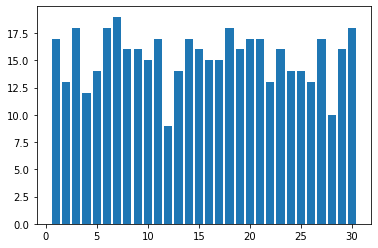

In [20]:
#Bar graph showing units sold throughtout the month 

plt.bar(output.DELIVERY_DATE,output.units_sold)
plt.show()

In [23]:
output_2 = sqldf("select ORDER_ITEM_NAME,DELIVERY_DATE, Quantity from products group by ORDER_ITEM_NAME,DELIVERY_DATE ")

In [24]:
pd.set_option('display.max_rows', None)

# Analyzing Sales by Day of the Week

In [27]:
data = product.copy()

In [30]:
data.DELIVERY_DATE = data.DELIVERY_DATE.str.split()
data.DELIVERY_DATE = data.DELIVERY_DATE.str[0]


0      2021-12-03
1      2021-12-04
2      2021-12-13
3      2021-12-24
4      2021-12-15
5      2021-12-08
6      2021-12-25
7      2021-12-26
8      2021-12-14
9      2021-12-20
10     2021-12-12
11     2021-12-06
12     2021-12-07
13     2021-12-05
14     2021-12-04
15     2021-12-01
16     2021-12-10
17     2021-12-27
18     2021-12-01
19     2021-12-19
20     2021-12-10
21     2021-12-16
22     2021-12-22
23     2021-12-21
24     2021-12-04
25     2021-12-19
26     2021-12-11
27     2021-12-23
28     2021-12-13
29     2021-12-15
30     2021-12-01
31     2021-12-18
32     2021-12-20
33     2021-12-26
34     2021-12-11
35     2021-12-15
36     2021-12-19
37     2021-12-11
38     2021-12-07
39     2021-12-04
40     2021-12-24
41     2021-12-26
42     2021-12-26
43     2021-12-15
44     2021-12-23
45     2021-12-17
46     2021-12-21
47     2021-12-11
48     2021-12-29
49     2021-12-15
50     2021-12-03
51     2021-12-23
52     2021-12-02
53     2021-12-10
54     2021-12-14
55     202

In [31]:
data['DELIVERY_DATE'] = pd.to_datetime(data['DELIVERY_DATE'])
products['day_of_week'] = 0
products['day_of_week'] = data['DELIVERY_DATE'].dt.day_name()

In [33]:
products.head()

,ORDER_ITEM_NAME,DELIVERY_DATE,Quantity,day_of_week
0,Jowar & Ragi Gluten-free bread (700 g),3,8.0,Friday
1,Multigrain Sandwich Loaf (400 g),4,10.0,Saturday
2,Multigrain Sandwich Loaf (400 g),13,14.0,Monday
3,Walnut & Cranberry Sourdough Bread (500g),24,3.0,Friday
4,Jowar & Ragi Gluten-free bread (700 g),15,10.0,Wednesday


In [46]:
# Finding total units sold on each day of the week 
query = sqldf("select day_of_week, ROUND(COUNT(Quantity),2) Units_Delivered  from products group by day_of_week ORDER BY 2 DESC; ")
query

,day_of_week,Units_Delivered
0,Wednesday,78.0
1,Thursday,78.0
2,Monday,66.0
3,Tuesday,63.0
4,Friday,62.0
5,Saturday,61.0
6,Sunday,52.0


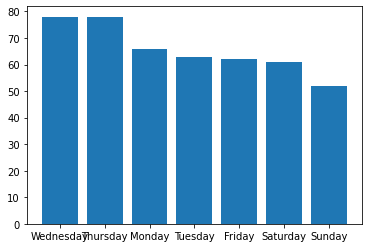

In [47]:
plt.bar(query.day_of_week,query.Units_Delivered)
plt.show()

### Hence we can see that on Friday and Tuesday least number on units were delivered. And on Wednesday and Thursday highest units were delivered.

# Analzying Sale of Each Product based on date:

In [52]:
dummy_df = pd.get_dummies(products["ORDER_ITEM_NAME"])

In [54]:
final = pd.concat([products['DELIVERY_DATE'],products['Quantity'],products['day_of_week'],dummy_df],axis=1)

In [63]:
final = final.sort_values(by='DELIVERY_DATE')

In [64]:
final

,DELIVERY_DATE,Quantity,day_of_week,Black Miche Sourdough Loaf,Bombay Ladi Pav (pack of 15),Cheese and Jalapeno Sourdough (550g),Cinnamon Sugar Bread Loaf (350g),Classic French Style Sourdough Bread (500 g),Country Sourdough Bread (500g),Deli Style Rye Bread (500g),...,Plain Bagels (Pack of 2) + cream cheese (25gm),Seed Feast Sourdough Bread (500 g),Seeded Gluten Free Bread,Sesame Bagels (Pack of 2)+ cream cheese (25gram),Sourdough Sandwich Loaf Bread (650g),Walnut & Cranberry Sourdough Bread (500g),Whole Wheat Burger Buns (pack of 4),Whole Wheat Oats Sandwich Loaf (500 gm),Whole Wheat Pita bread (1 packet (3 pieces),Whole Wheat Sandwich Loaf (400 g)
88,1,2.0,Wednesday,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
200,1,1.0,Wednesday,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,1,1.0,Wednesday,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,1,2.0,Wednesday,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
144,1,2.0,Wednesday,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,1,2.0,Wednesday,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,1,2.0,Wednesday,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
137,1,10.0,Wednesday,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290,1,6.0,Wednesday,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15,1,4.0,Wednesday,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [150]:
model = final.copy()

In [152]:
for i,row in model.iterrows():
    for k in row.keys():
        if row[k] == 1:
            model.at[i,k]=row['Quantity']
            
            

In [154]:
model_try=model.groupby('DELIVERY_DATE').sum()

In [177]:
model_try.reset_index(inplace=True)

## Plotting scatter plots of top 3 selling products to identify trends

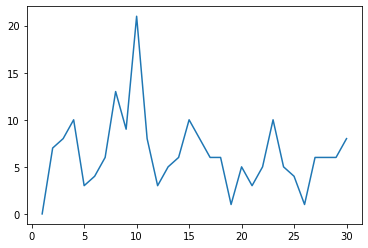

In [178]:
plt.plot(model_try['DELIVERY_DATE'],model_try['Jowar & Ragi Gluten-free bread (700 g)'])

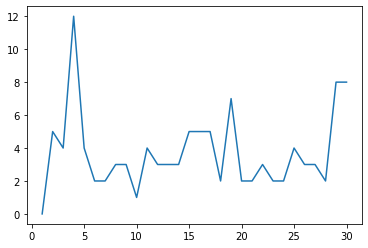

In [182]:
plt.plot(model_try['DELIVERY_DATE'],model_try['Seeded Gluten Free Bread'])

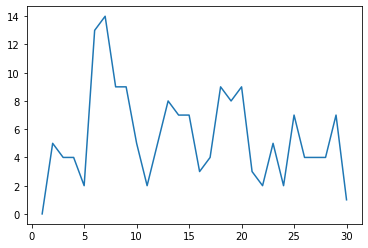

In [187]:
plt.plot(model_try['DELIVERY_DATE'],model_try['Whole Wheat Sandwich Loaf   (400 g)'])

## This shows that demand for a product spikes at regular intervals. Hence demand for each product should be estimated based on the sale of the last 7 days. 

In [159]:
model_day = model.groupby('day_of_week').sum()
model_day.reset_index(inplace=True)
model_day

,day_of_week,DELIVERY_DATE,Quantity,Black Miche Sourdough Loaf,Bombay Ladi Pav (pack of 15),Cheese and Jalapeno Sourdough (550g),Cinnamon Sugar Bread Loaf (350g),Classic French Style Sourdough Bread (500 g),Country Sourdough Bread (500g),Deli Style Rye Bread (500g),Dry Garlic Chutney Loaf (350 g),Everything Bagel (Pack of 2) + Cream Cheese (25 g),French Baguette (16 inch - 350 g),Gluten free buns ( Pack of 2),Gochujang (Korean Chilli Paste) and Sesame Loaf Bread (350gm),Jalapeno Bagels &amp; Cheese,Jowar & Ragi Gluten-free bread (700 g),Miche Whole Wheat Sourdough Bread (550g),Multigrain Burger Buns (pack of 4),Multigrain Sandwich Loaf (400 g),"Olive, Sundried Tomato and Cheddar Loaf (350 g)",Plain Bagels (Pack of 2) + cream cheese (25gm),Seed Feast Sourdough Bread (500 g),Seeded Gluten Free Bread,Sesame Bagels (Pack of 2)+ cream cheese (25gram),Sourdough Sandwich Loaf Bread (650g),Walnut & Cranberry Sourdough Bread (500g),Whole Wheat Burger Buns (pack of 4),Whole Wheat Oats Sandwich Loaf (500 gm),Whole Wheat Pita bread (1 packet (3 pieces),Whole Wheat Sandwich Loaf (400 g)
0,Friday,795,175.0,1,6,4,0,8,5,0,0,9,4,1,0,2,30,3,2,39,0,3,4,12,3,5,11,6,2,0,15
1,Monday,1089,213.0,3,4,6,1,3,9,0,0,4,8,3,3,1,20,19,0,53,0,4,1,10,5,5,10,5,3,4,28
2,Saturday,909,204.0,2,6,7,1,4,3,0,0,3,10,7,0,3,28,8,3,49,0,0,2,18,4,9,11,4,0,0,22
3,Sunday,820,154.0,3,3,2,2,6,0,1,1,2,0,5,0,2,8,6,0,50,1,1,2,17,1,7,12,3,0,0,19
4,Thursday,1318,269.0,4,7,4,3,3,8,0,0,10,5,4,0,2,42,16,2,67,1,1,4,23,3,12,19,2,3,0,23
5,Tuesday,1008,179.0,0,5,3,2,4,2,0,1,8,8,4,1,4,21,9,1,39,0,4,4,9,3,11,7,1,0,0,28
6,Wednesday,1168,282.0,3,3,1,1,5,3,0,2,13,5,4,0,3,44,19,1,66,2,6,5,23,6,13,17,5,1,0,31


## We will Analyze Sales Trend for top products based on 'day of week'

In [113]:
model = pd.DataFrame.from_dict(model)

In [ ]:
Multigrain Sandwich Loaf (400 g)	12.10
1	Jowar & Ragi Gluten-free bread (700 g)	6.43
2	Whole Wheat Sandwich Loaf (400 g)	5.53
3	Seeded Gluten Free Bread	3.73

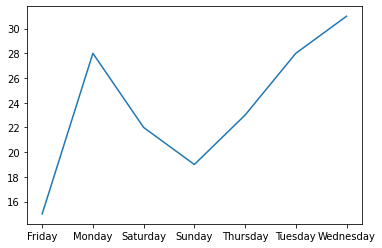

In [190]:
# Analyzing Whole Wheat Sandwich Loaf(400 g)
plt.plot(model_day['day_of_week'],model_day['Whole Wheat Sandwich Loaf   (400 g)'])

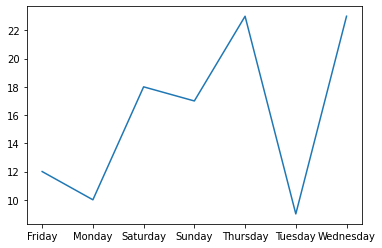

In [160]:
# Analyzing Seeded Gluten Free Bread (400 g)
plt.plot(model_day['day_of_week'],model_day['Seeded Gluten Free Bread'])

## This confirms the trend that we saw earlier that the order for the products occurs after a regular interval. Hence demand drops the day after order is placed.

## Hence we now know why our initial estimation model saw such high error values for top selling products as the demand rapidly fluctuates at regular intervals. So the demand for 2 consecutives days will vary a lot. 

## Therefore to estimate the demand of a product we would need the sale data of that particular product for the past 7 days